In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
slowk, slowd = ta.STOCH(df['high'], df['low'], df['close'], fastk_period=5, slowk_period=3, slowd_period=3)
df['SlowK'] = slowk
df['SlowD'] = slowd
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X_K = df[['SlowK']].values
X_D = df[['SlowD']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()
X_K_scaled = scaler.fit_transform(X_K)
X_D_scaled = scaler.fit_transform(X_D)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

# 학습 데이터와 테스트 데이터 분할
X_K_train, X_K_test, Y_K_train, Y_K_test = train_test_split(X_K, Y, 
                                                    test_size=0.2, shuffle=False,
                                                            random_state=0)
X_D_train, X_D_test, Y_D_train, Y_D_test = train_test_split(X_D, Y, 
                                                    test_size=0.2, shuffle=False,
                                                            random_state=0)

# X 학습 테스트
X_K_train = scaler.fit_transform(X_K_train)
X_K_test = scaler.fit_transform(X_K_test)

X_D_train = scaler.fit_transform(X_D_train)
X_D_test = scaler.fit_transform(X_D_test)

# Y 학습 테스트
Y_K_train = scaler.fit_transform(Y_K_train.reshape(-1, 1)).flatten()
Y_K_test = scaler.fit_transform(Y_K_test.reshape(-1, 1)).flatten()

Y_D_train = scaler.fit_transform(Y_D_train.reshape(-1, 1)).flatten()
Y_D_test = scaler.fit_transform(Y_D_test.reshape(-1, 1)).flatten()

# 전체 비교용 X Y
X_K_scaled = scaler.fit_transform(X_K)
X_D_scaled = scaler.fit_transform(X_D)

Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

# 모델 구축
model_K = LinearRegression()
model_D = LinearRegression()

# 모델 학습
model_K.fit(X_K_train, Y_K_train)
model_D.fit(X_D_train, Y_D_train)

# 테스트 데이터 예측
Y_K_pred = model_K.predict(X_K_test)
Y_D_pred = model_D.predict(X_D_test)

Y_K_pred_all = model_K.predict(X_K_scaled)
Y_D_pred_all = model_D.predict(X_D_scaled)

# 예측 결과 역스케일링
Y_K_pred_scaled = scaler.inverse_transform(Y_K_pred.reshape(-1, 1)).flatten()
Y_K_pred_scaled_all = scaler.inverse_transform(Y_K_pred_all.reshape(-1, 1)).flatten()

Y_D_pred_scaled = scaler.inverse_transform(Y_D_pred.reshape(-1, 1)).flatten()
Y_D_pred_scaled_all = scaler.inverse_transform(Y_D_pred_all.reshape(-1, 1)).flatten()

Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_K_pred_scaled)
print(Y_D_pred_scaled)

[23799911.16170911 23012871.98731296 22086551.73404412 21526614.48365707
 21741438.31600918 21863662.56279456 22536901.94759569 22965763.96802975
 23397502.72483739 23060232.39688917 22445299.1220659  22289426.6077609
 22000694.8955369  22735197.94354193 22440980.41130559 22513563.14668057
 21469560.67444739 21291619.92839092 21093292.83032313 21128570.53327293
 21303550.03295062 21590772.71107816 21819334.35104777 22200372.45124505
 22648131.43849176 22978968.1006619  22797445.51806176 22057655.83638549
 21951560.54864155 21812788.11694762 22273286.25874143 22742655.73842896
 22737580.67206789 22835337.11734426 22421227.87123802 22779252.41046157
 22403842.89241075 22183415.66833507 22256462.71739401 23253453.51177989
 23962387.89694593 23708354.75984104 23068531.519723   22164297.35606775
 21955801.63119582 21678167.79506215 22580356.87767623 23434484.43293915
 23747739.89954368 23017050.99821844 22010611.23360266 21568757.99786936
 21147571.91072279 21126625.27223183 21130240.408888

In [3]:
r2_train_K = r2_score(Y_K_train, model_K.predict(X_K_train))
r2_test_K = r2_score(Y_K_test, Y_K_pred)

r2_train_D = r2_score(Y_D_train, model_D.predict(X_D_train))
r2_test_D = r2_score(Y_D_test, Y_D_pred)

print(f"[r2_score with SlowK] train : {r2_train_K} / test : {r2_test_K}")
print(f"[r2_score with SlowD] train : {r2_train_D} / test : {r2_test_D}")

# mse
mse_K = mean_squared_error(Y_K_test, Y_K_pred)
mse_D = mean_squared_error(Y_D_test, Y_D_pred)

# rmse
rmse_K = np.sqrt(mse_K)
rmse_D = np.sqrt(mse_D)

print(f'[MSE with SlowK] : {mse_K:.3f}\n[RMSE with SlowK] : {rmse_K:.3f}')
print(f'[MSE with SlowD] : {mse_D:.3f}\n[RMSE with SlowD] : {rmse_D:.3f}')

[r2_score with SlowK] train : 0.0021454912036987794 / test : -0.18605613242615604
[r2_score with SlowD] train : 0.002644397791784714 / test : -0.18637432594937975
[MSE with SlowK] : 0.058
[RMSE with SlowK] : 0.240
[MSE with SlowD] : 0.058
[RMSE with SlowD] : 0.240


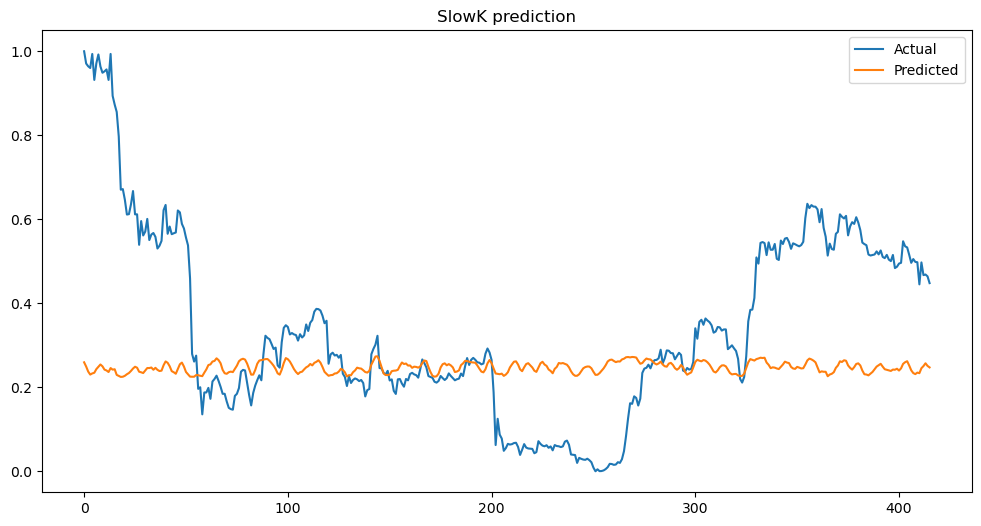

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(Y_K_test, label='Actual')
plt.plot(Y_K_pred, label='Predicted')
plt.title('SlowK prediction')
plt.legend()
plt.show()

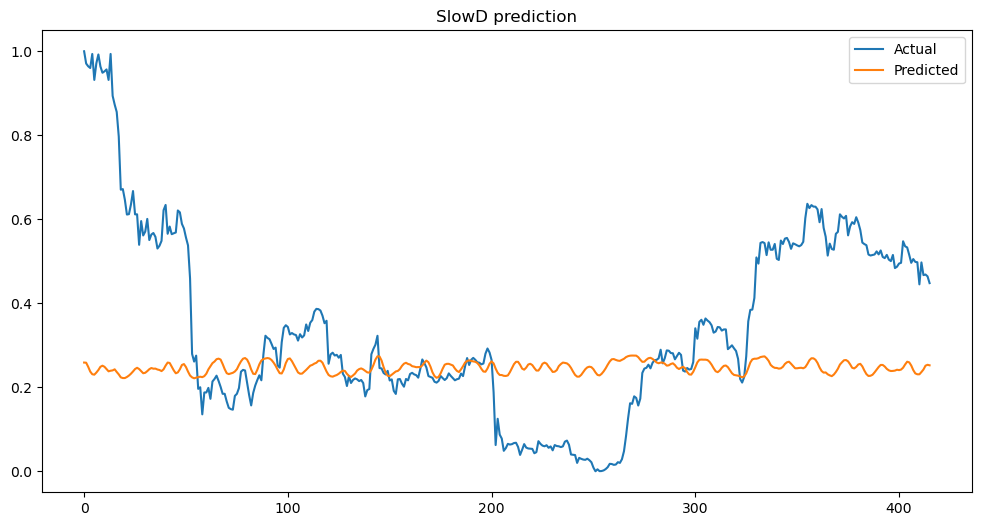

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(Y_D_test, label='Actual')
plt.plot(Y_D_pred, label='Predicted')
plt.title('SlowD prediction')
plt.legend()
plt.show()

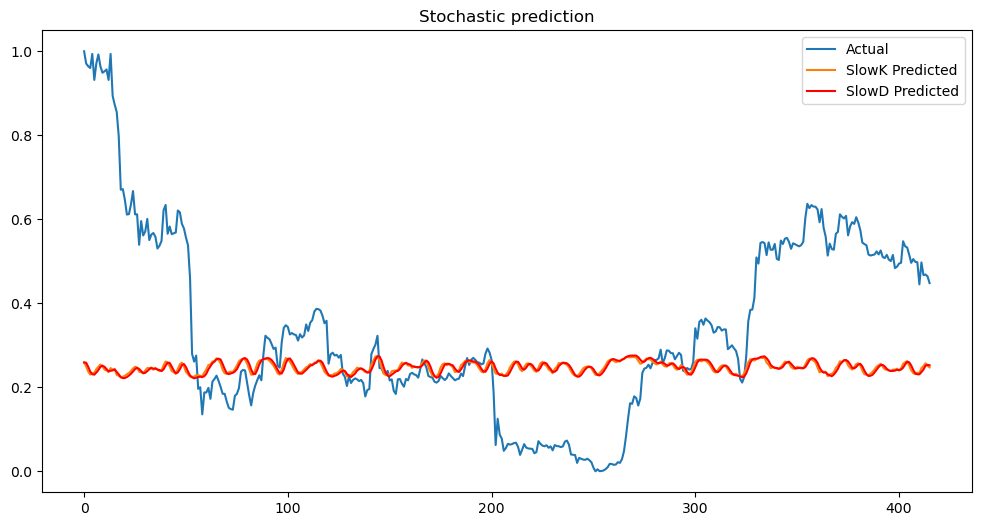

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(Y_D_test, label='Actual')
plt.plot(Y_K_pred, label='SlowK Predicted')
plt.plot(Y_D_pred, label='SlowD Predicted', color='red')
plt.title('Stochastic prediction')
plt.legend()
plt.show()